<a href="https://colab.research.google.com/github/victorjms/curvas_roc/blob/main/curvas_ROC_VM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Victor Montenegro

# Tarea
Los datos, que fueron modificados a partir de esta fuente, contienen información sobre campañas de marketing directo de una institución bancaria portuguesa. Las campañas de marketing se basaron en llamadas telefónicas. El objetivo es predecir si el cliente se suscribirá (sí: 1 o no: 0) a un depósito a plazo (la columna de destino se llama 'y_yes' en este csv).

Tu tarea es construir un modelo de regresión logística para predecir si un cliente se suscribirá o no. Ajusta los hiperparámetros para obtener el mejor modelo posible. Luego, calcula las siguientes métricas de clasificación:

Métricas para calcular:

Precisión
Sensibilidad
Especificidad
AUC ROC
Además, grafica la República de China.
Preguntas para pensar y responder
Después de completar la tarea, responde las siguientes preguntas:

# ¿Qué métrica será la mejor para evaluar tu modelo de clasificación para este conjunto de datos y por qué? Sugerencia: piensa en lo que significa cada métrica en este escenario específico. ¿Qué métrica va a ayudar más al banco?

Los modelos de clasificición
# Compara la precisión de tu modelo con el modelo de referencia. ¿Ves algún problema aquí?
No se ajusta al 100%
# ¿De qué otras formas podrías mejorar este modelo?
No lo tengo claro

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import folium
filename = '/content/drive/My Drive/Coding_Dojo/Semana_08/bank_modified.csv' # colocamos la ruta del archivo a importar
df = pd.read_csv(filename) # colocamos el contenido del archivo en "df"
df # imprimimos "df"

,age,balance,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,y_yes
0,30,1787,79,1,-1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
1,33,4789,220,1,339,4,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,1,0
2,35,1350,185,1,330,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0
3,30,1476,199,4,-1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0
4,59,0,226,1,-1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,-333,329,5,-1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0
4517,57,-3313,153,1,-1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,1,1,0
4518,57,295,151,11,-1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0
4519,28,1137,129,4,211,3,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0


In [ ]:
df.describe()

,age,balance,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,y_yes
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,263.961292,2.793630,39.766645,0.542579,0.209246,0.037160,0.024773,0.214333,0.050874,0.040478,0.092236,0.018580,0.169874,0.028312,0.008405,0.618668,0.264543,0.510064,0.298607,0.041363,0.016810,0.566025,0.152842,0.115240
std,10.576211,3009.638142,259.856633,3.109807,100.121124,1.693562,0.406815,0.189174,0.155451,0.410404,0.219764,0.197099,0.289391,0.135051,0.375564,0.165882,0.091304,0.485767,0.441138,0.499954,0.457697,0.199149,0.128575,0.495676,0.359875,0.319347
min,19.000000,-3313.000000,4.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,69.000000,104.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,444.000000,185.000000,2.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,49.000000,1480.000000,329.000000,3.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,87.000000,71188.000000,3025.000000,50.000000,871.000000,25.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


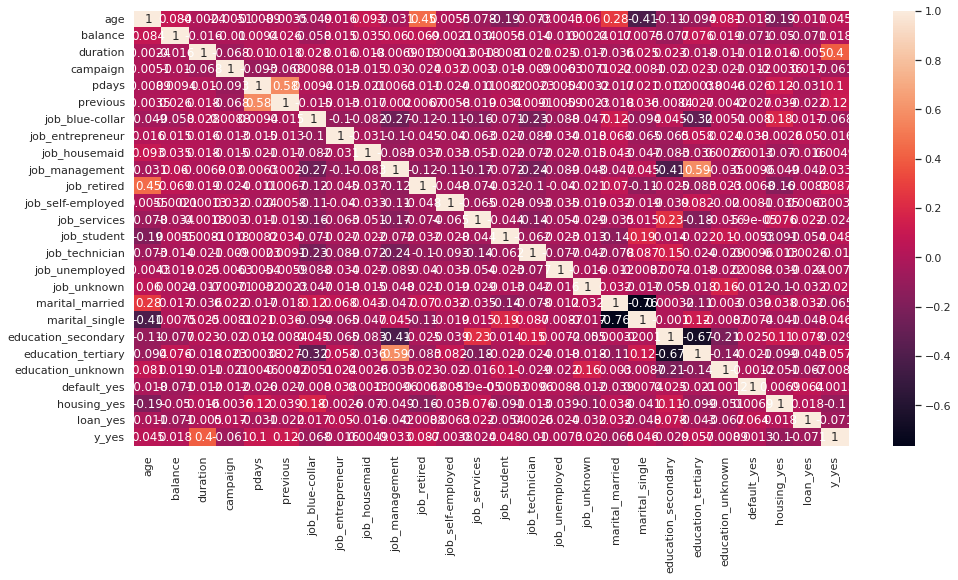

In [ ]:
import seaborn as sns
sns.set(rc={'figure.figsize':(16,8)})
import matplotlib.pyplot as plt

sns.heatmap(df.corr(), annot=True)
plt.show()

# Curva ROC

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, plot_roc_curve

In [ ]:
# Dividir en X e y
X = df.drop(columns = 'y_yes')
y = df['y_yes']
# Crea una instancia del modelo
logreg = LogisticRegression(C = .001)
# División entrenamiento prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)
# Escalar la regresión logística
scaler = StandardScaler()
# Ajustar solo al conjunto de entrenamiento
scaler.fit(X_train)
# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
# Entrenamiento del modelo con los datos, almacenando la información aprendida de los datos
# Model está aprendiendo la relación entre X e y
logreg.fit(X_train, y_train)

LogisticRegression(C=0.001)

In [ ]:
# Calcular el AUC para conjuntos de entrenamiento y prueba
print(f'Training AUC: {roc_auc_score(y_train, logreg.predict_proba(X_train)[:,1])}')
print(f'Testing AUC: {roc_auc_score(y_test, logreg.predict_proba(X_test)[:,1])}')


Training AUC: 0.8541820566169445
Testing AUC: 0.868423942027167


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


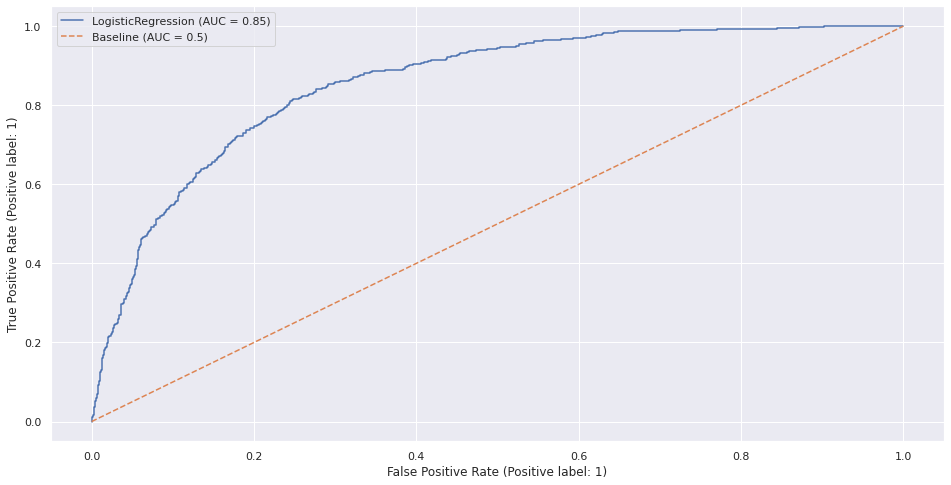

In [ ]:
# Visualizar la curva ROC
plot_roc_curve(logreg, X_train, y_train)
plt.plot([0, 1], [0, 1], ls = '--', label = 'Baseline (AUC = 0.5)')
plt.legend();

# Regresión Logística

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
model.score(X_test,y_test)

0.8947833775419982

# Precision

In [ ]:
log_reg = LogisticRegression(penalty='l1',
                        C=1.0,
                        solver='liblinear',
                        multi_class='ovr')
log_reg.fit(X_train, y_train)
print('Training accuracy:', log_reg.score(X_train, y_train))
print('Test accuracy:', log_reg.score(X_test, y_test))

Training accuracy: 0.8905604719764012
Test accuracy: 0.8947833775419982


In [ ]:
log_reg.intercept_


array([-2.50676051])

In [ ]:
log_reg.coef_


array([[ 0.07771063, -0.00361999,  0.98238031, -0.22903065,  0.16577412,
         0.14984095, -0.21953887, -0.08228453, -0.02189884, -0.04013493,
         0.10625902, -0.0289064 , -0.0755869 ,  0.10998342, -0.02779884,
        -0.10604326,  0.02808679, -0.14425495, -0.02941286, -0.00942535,
         0.14977698, -0.05633507,  0.00483348, -0.33587549, -0.25134463]])

In [ ]:
log_reg.predict_proba(X_test[0:1])

array([[0.97376582, 0.02623418]])

In [ ]:
log_reg.predict(X_test[0:1])

array([0])

In [ ]:
!pip install geopandas

     |████████████████████████████████| 1.0 MB 5.7 MB/s 
     |████████████████████████████████| 16.7 MB 239 kB/s 


In [ ]:
!pip install contextily

     |████████████████████████████████| 19.3 MB 31.6 MB/s 


In [ ]:
import geopandas as gpd

In [ ]:
help(geopandas)

Help on package geopandas:

NAME
    geopandas

PACKAGE CONTENTS
    _compat
    _config
    _decorator
    _vectorized
    _version
    array
    base
    conftest
    datasets (package)
    explore
    geodataframe
    geoseries
    io (package)
    plotting
    sindex
    testing
    tests (package)
    tools (package)

DATA
    options = Options(
      display_precision: None [default: Non...USE_PYGEO...

VERSION
    0.10.2

FILE
    /usr/local/lib/python3.7/dist-packages/geopandas/__init__.py




# Graficar el mapa de China

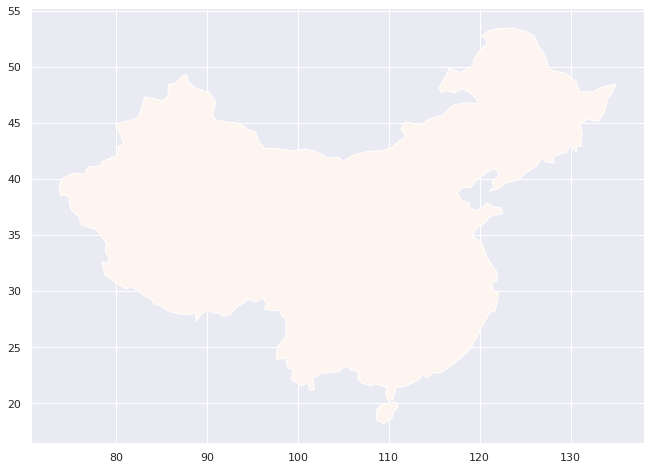

In [ ]:
worldfiltered = world[world.name == "China"]
worldfiltered.plot(column ='pop_est', cmap ='Reds')